# Predict Loan Eligibility for Dream Housing Finance company

## Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Data Description 

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

| Variable	| Description | 
|----------------|:--------------------|
| Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|
|Loan_Status	|(Target) Loan approved (Y/N)|
 

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

|Variable	|Description|
|------------|:-----------|
| Loan_ID|	Unique Loan ID|
|Gender	|Male/ Female|
|Married|	Applicant married (Y/N)|
|Dependents	|Number of dependents|
|Education|	Applicant Education (Graduate/ Under Graduate)|
|Self_Employed	|Self employed (Y/N)|
|ApplicantIncome	|Applicant income|
|CoapplicantIncome|	Coapplicant income|
|LoanAmount|	Loan amount in thousands
|Loan_Amount_Term	|Term of loan in months|
|Credit_History	|credit history meets guidelines|
|Property_Area	|Urban/ Semi Urban/ Rural|

In [1]:
#importing the libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "C:\Users\Thor_after_infinity\Desktop\ML Datasets\Loan Predictions"

C:\Users\Thor_after_infinity\Desktop\ML Datasets\Loan Predictions


    -> The train file contains the complete data set with the dependent variable (y) that we want to predict.
    
    -> The test file does not have the dependent variable (y), so we need to use the model that we built on the train data to make predictions. 
    
    -> The sample submission file is where we copy our predictions and upload them to the competition site to check the result and accuracy.

In [3]:
loantrain=pd.read_csv('train.csv') # importing train file
loantest=pd.read_csv('test.csv')# importing test file

## Data Preprocessing and Exploratory Data Analysis.

In [4]:
print(loantrain.shape)
print(loantest.shape)

(614, 13)
(367, 12)


In [5]:
loantrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loantrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loantrain.isnull().sum() # chechking for missing values.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loantest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
loantest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
loantest.isnull().sum() # chechking for missing values.

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

To handle the missing data problem, we need to merge the train and test files into a single dataset using the appropriate method.

Combine Both Dataframes for preprocessing

For Concatenation of 2 dataframes the number of variables and squence of variables must be same.

In [11]:
#Temporarly add dependent variable to test data for preprocessing
loantest['Loan_Status']='test'

In [12]:
combinedf=pd.concat([loantrain,loantest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


### Imputing the missing values

The following variables have missing values Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.

In [14]:
combinedf.Loan_Amount_Term=combinedf.Loan_Amount_Term.astype('object')
#changing the datatype to object as it is a categorical variable.

In [15]:
combinedf.Gender.value_counts(dropna=False)

Gender
Male      775
Female    182
NaN        24
Name: count, dtype: int64

In [16]:
combinedf.Gender=combinedf.Gender.fillna('Male') # Imputin the missing values with Male

In [17]:
combinedf.Married.value_counts(dropna=False)

Married
Yes    631
No     347
NaN      3
Name: count, dtype: int64

In [18]:
combinedf.Married=combinedf.Married.fillna('Yes')# Imputin the missing values with Yes

In [19]:
combinedf.Dependents.value_counts(dropna=False)

Dependents
0      545
1      160
2      160
3+      91
NaN     25
Name: count, dtype: int64

In [20]:
combinedf.Dependents=combinedf.Dependents.fillna('0') # Imputin the missing values with 0

In [21]:
combinedf.Self_Employed.value_counts(dropna=False)

Self_Employed
No     807
Yes    119
NaN     55
Name: count, dtype: int64

In [22]:
combinedf.Self_Employed=combinedf.Self_Employed.fillna('No') # Imputin the missing values with No

In [23]:
combinedf.LoanAmount.describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [24]:
combinedf.LoanAmount=combinedf.LoanAmount.fillna(combinedf.LoanAmount.mean()) # Imputin the missing values with mean

In [25]:
combinedf.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    823
180.0     66
480.0     23
NaN       20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: count, dtype: int64

In [26]:
combinedf.Loan_Amount_Term=combinedf.Loan_Amount_Term.fillna('360.0') # Imputin the missing values with '360'

In [27]:
combinedf.Credit_History.value_counts(dropna=False)

Credit_History
1.0    754
0.0    148
NaN     79
Name: count, dtype: int64

In [28]:
combinedf.Credit_History=combinedf.Credit_History.fillna(1.0) # Imputin the missing values with mean 1.0

In [29]:
combinedf=combinedf.drop('Loan_ID',axis=1)

In [30]:
combinedf.isnull().sum() #No missing values in the dataset.

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      799
Female    182
Name: count, dtype: int64


Text(0.5, 1.0, 'Loan status of different genders')

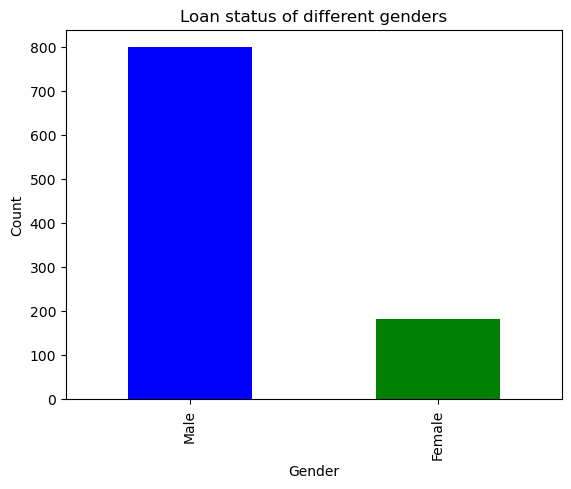

In [31]:
print(combinedf.Gender.value_counts())
combinedf.Gender.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan status of different genders')

Married
Yes    634
No     347
Name: count, dtype: int64


Text(0.5, 1.0, 'Loan status of customers married life')

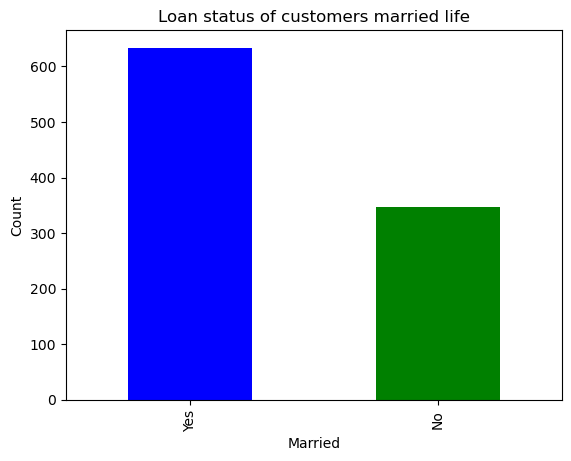

In [32]:
print(combinedf.Married.value_counts())
combinedf.Married.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Loan status of customers married life')

Dependents
0     570
1     160
2     160
3+     91
Name: count, dtype: int64


Text(0.5, 1.0, 'How may are dependent on the loan payer')

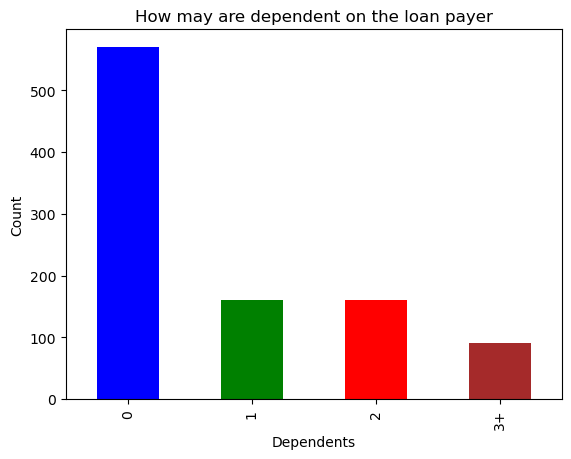

In [33]:
print(combinedf.Dependents.value_counts())
combinedf.Dependents.value_counts().plot(kind='bar', color=['blue', 'green','red','brown'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('How may are dependent on the loan payer')

Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64


Text(0.5, 1.0, 'Education of the loan payer')

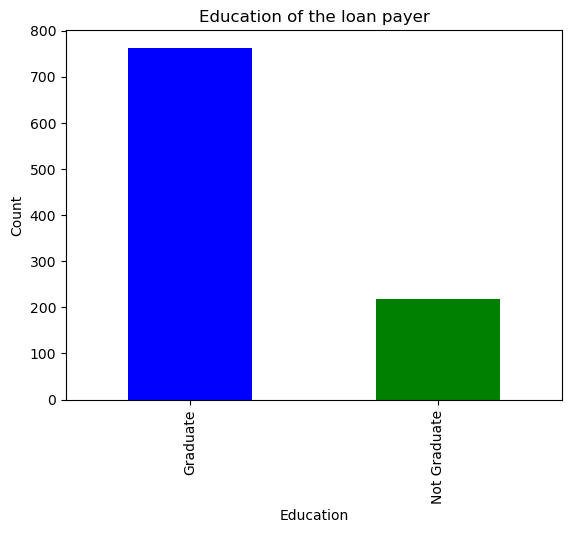

In [34]:
print(combinedf.Education.value_counts())
combinedf.Education.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education of the loan payer')

Self_Employed
No     862
Yes    119
Name: count, dtype: int64


Text(0.5, 1.0, "How many Loan payer's are Self Employed ")

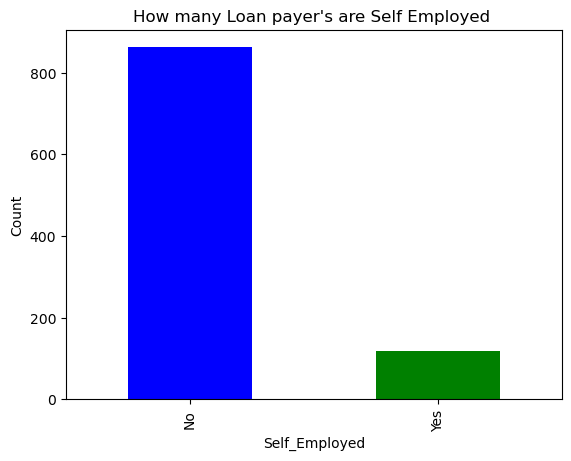

In [35]:
print(combinedf.Self_Employed.value_counts())
combinedf.Self_Employed.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title("How many Loan payer's are Self Employed ")

Loan_Amount_Term
360.0    823
180.0     66
480.0     23
360.0     20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: count, dtype: int64


Text(0.5, 1.0, 'What is the most popular Loan Term')

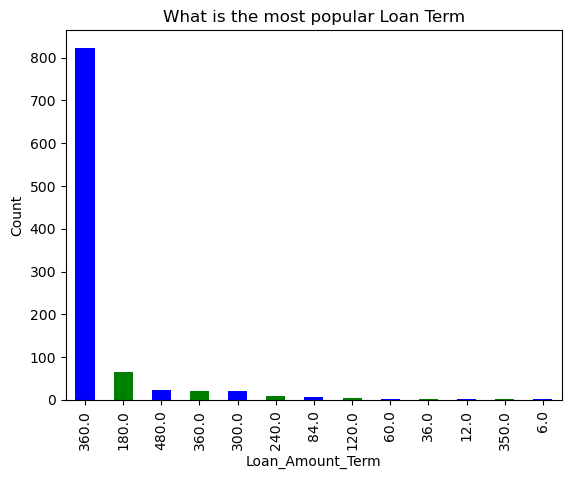

In [36]:
print(combinedf.Loan_Amount_Term.value_counts())
combinedf.Loan_Amount_Term.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Count')
plt.title("What is the most popular Loan Term")

Credit_History
1.0    833
0.0    148
Name: count, dtype: int64


Text(0.5, 1.0, 'What is the most popular Loan Term')

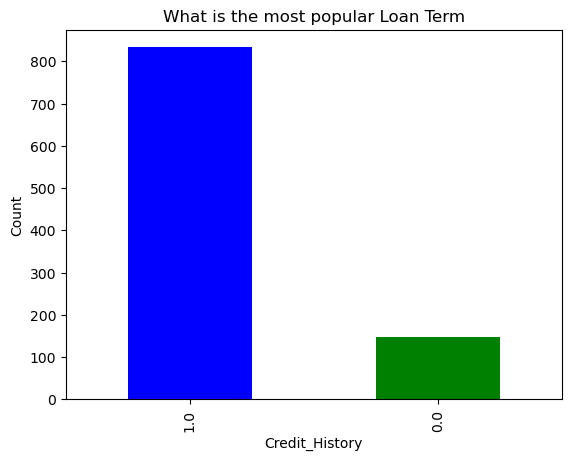

In [37]:
print(combinedf.Credit_History.value_counts())
combinedf.Credit_History.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title("What is the most popular Loan Term")

In [38]:
combinedf.Credit_History=combinedf.Credit_History.astype('object')
#changing the datatype to object as it is a categorical variable.

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64


Text(0.5, 1.0, 'Property_Area of the customers')

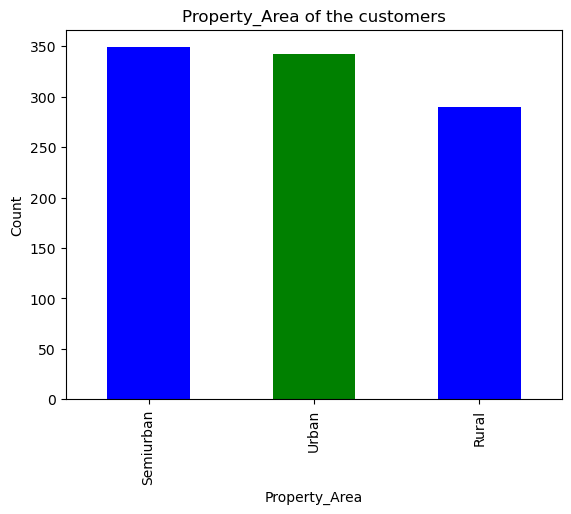

In [39]:
print(combinedf.Property_Area.value_counts())
combinedf.Property_Area.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title("Property_Area of the customers")

In [40]:
combinedf.describe() #Descriptive statics of the numerical veriables.

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,981.00000
mean,5179.795107,1601.916330,142.51153
std,5695.104533,2718.772806,76.34777
min,0.000000,0.000000,9.00000
25%,2875.000000,0.000000,101.00000
50%,3800.000000,1110.000000,128.00000
75%,5516.000000,2365.000000,160.00000
max,81000.000000,41667.000000,700.00000


<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

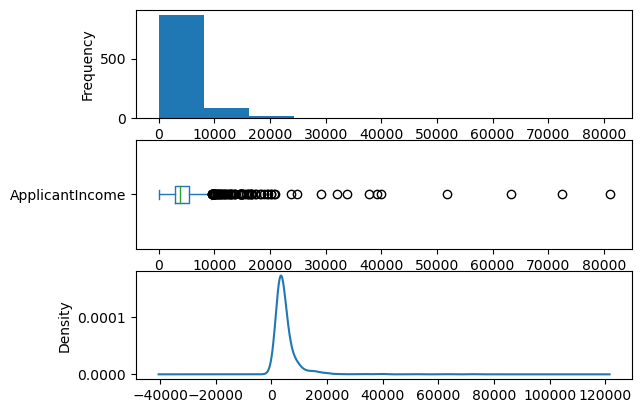

In [41]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
combinedf.ApplicantIncome.plot(kind='hist',ax=ax[0])
combinedf.ApplicantIncome.plot(kind='box',vert=False,ax=ax[1])
combinedf.ApplicantIncome.plot(kind='kde',ax=ax[2])

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

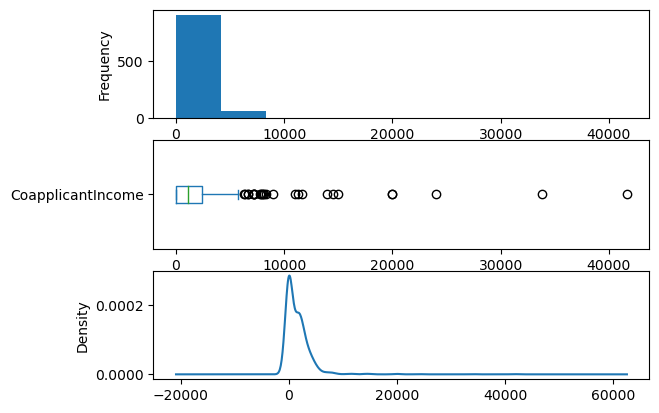

In [42]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
combinedf.CoapplicantIncome.plot(kind='hist',ax=ax[0])
combinedf.CoapplicantIncome.plot(kind='box',vert=False,ax=ax[1])
combinedf.CoapplicantIncome.plot(kind='kde',ax=ax[2])

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

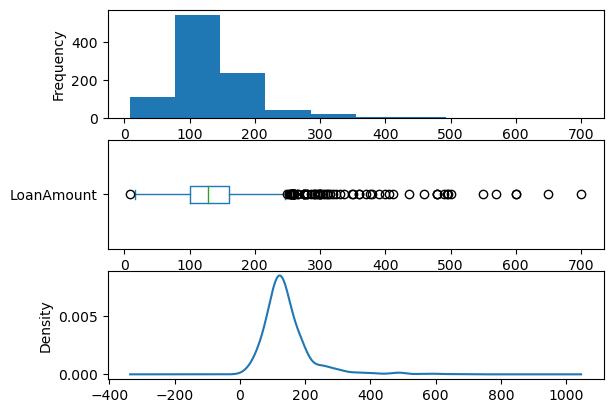

In [43]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
combinedf.LoanAmount.plot(kind='hist',ax=ax[0])
combinedf.LoanAmount.plot(kind='box',vert=False,ax=ax[1])
combinedf.LoanAmount.plot(kind='kde',ax=ax[2])

### Splitting the data into numerical and categorical variables.

We are spliting the data into numeric columns and object columns, to scale the data for numeric columns and imputing the dummies in object such each every data can be in 0's and 1's for building the Machine Learning models.

In [44]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [45]:
numcols.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,142.51153
1,4583,1508.0,128.00000
2,3000,0.0,66.00000
3,2583,2358.0,120.00000
4,6000,0.0,141.00000


In [46]:
numcols.corr() #checking the correlation between the numerical variables.

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.114247,0.547188
CoapplicantIncome,-0.114247,1.000000,0.178449
LoanAmount,0.547188,0.178449,1.000000


### Data Manipulation (dummy encoding of categorical variables.)

In [47]:
objcols.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
objcols_dummy=pd.get_dummies(objcols,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [49]:
objcols_dummy.head()

,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,False,True,True,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,N,False,True,False,True,False,True,False,False,True,...,False,False,True,False,False,False,True,True,False,False
2,Y,False,True,False,True,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
3,Y,False,True,False,True,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,Y,False,True,True,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True


In [50]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [51]:
objcols_dummy.head()

,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,N,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2,Y,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,Y,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,Y,0,1,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [52]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [53]:
combinedf_clean.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_300.0,Loan_Amount_Term_350.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_360.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,142.51153,Y,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,4583,1508.0,128.00000,N,0,1,0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
2,3000,0.0,66.00000,Y,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120.00000,Y,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
4,6000,0.0,141.00000,Y,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [54]:
#split data back to train and test 
loantrain_df=combinedf_clean[combinedf_clean.Loan_Status!='test']
loantest_df=combinedf_clean[combinedf_clean.Loan_Status=='test']

In [55]:
#split data back to train and test for EDA Hypothesis testing as this dataset doesn't have dummies in categorical columns.
loantrain_EDA=combinedf[combinedf.Loan_Status!='test']
loantest_EDA=combinedf[combinedf.Loan_Status=='test']

In [56]:
loantest_df=loantest_df.drop('Loan_Status',axis=1)

### Cross Tabulation

Gender       Female  Male
Loan_Status              
N                37   155
Y                75   347


<Axes: xlabel='Loan_Status'>

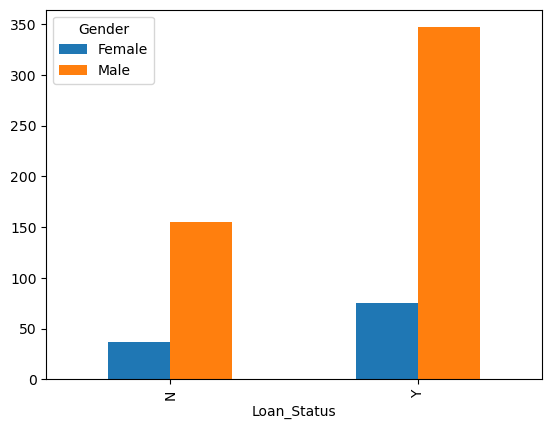

In [57]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Gender))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Gender).plot(kind='bar')

Married       No  Yes
Loan_Status          
N             79  113
Y            134  288


<Axes: xlabel='Loan_Status'>

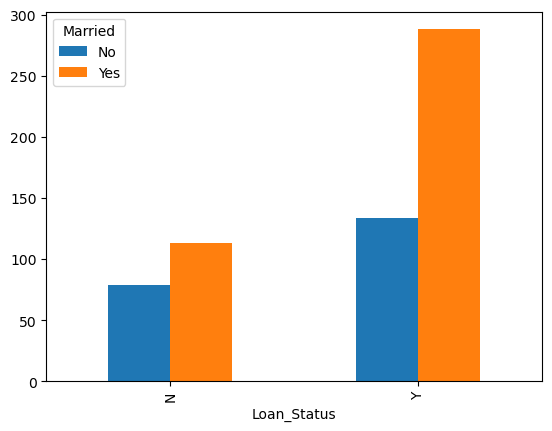

In [58]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Married))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Married).plot(kind='bar')

Dependents     0   1   2  3+
Loan_Status                 
N            113  36  25  18
Y            247  66  76  33


<Axes: xlabel='Loan_Status'>

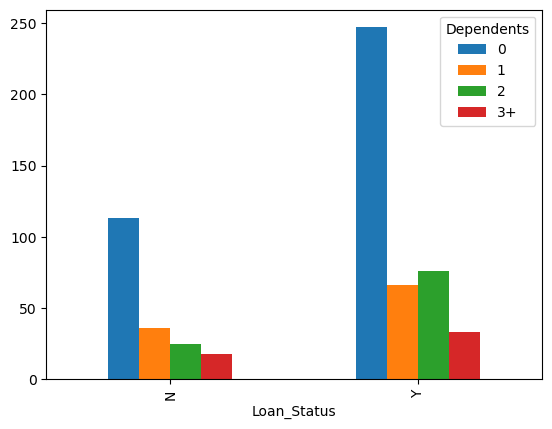

In [59]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Dependents))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Dependents).plot(kind='bar')

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


<Axes: xlabel='Loan_Status'>

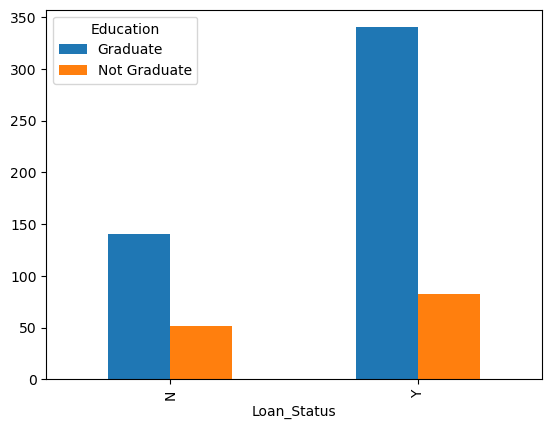

In [60]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Education))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Education).plot(kind='bar')

Self_Employed   No  Yes
Loan_Status            
N              166   26
Y              366   56


<Axes: xlabel='Loan_Status'>

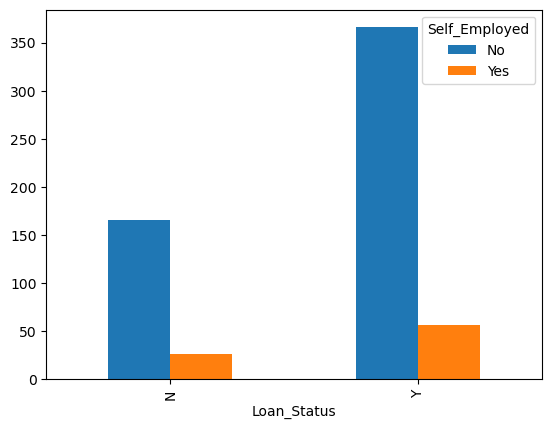

In [61]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Self_Employed))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Self_Employed).plot(kind='bar')

Loan_Amount_Term  12.0  36.0  60.0  84.0  120.0  180.0  240.0  300.0  360.0  \
Loan_Status                                                                   
N                    0     2     0     1      0     15      1      5    153   
Y                    1     0     2     3      3     29      3      8    359   

Loan_Amount_Term  480.0  360.0  
Loan_Status                     
N                     9      6  
Y                     6      8  


<Axes: xlabel='Loan_Status'>

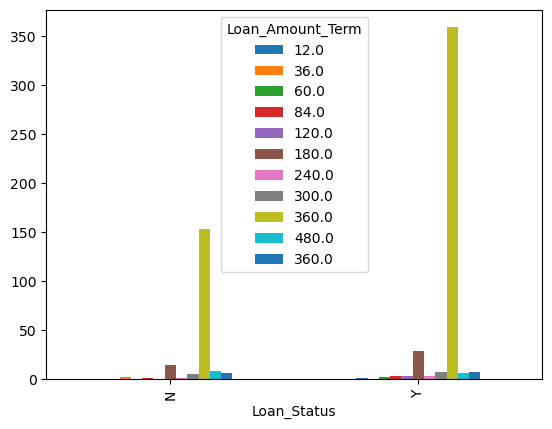

In [62]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Loan_Amount_Term))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Loan_Amount_Term).plot(kind='bar')

Credit_History  0.0  1.0
Loan_Status             
N                82  110
Y                 7  415


<Axes: xlabel='Loan_Status'>

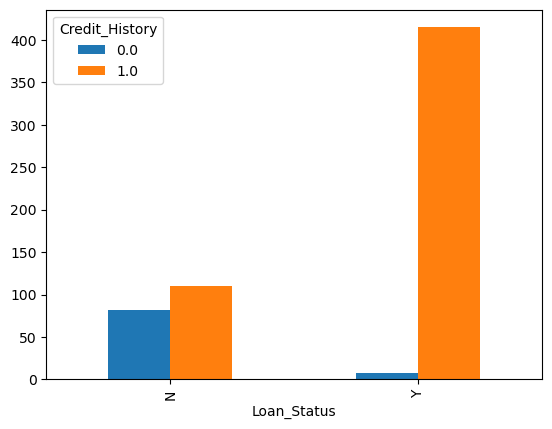

In [63]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Credit_History))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Credit_History).plot(kind='bar')

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


<Axes: xlabel='Loan_Status'>

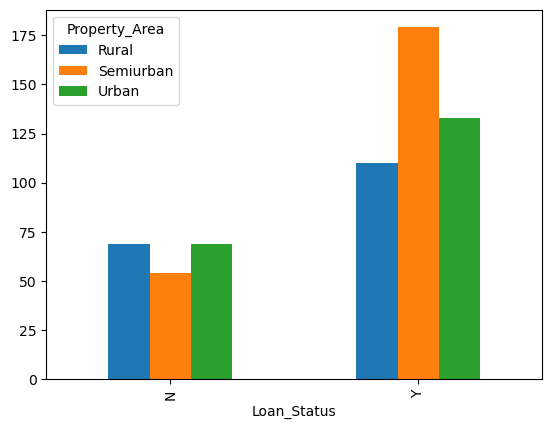

In [64]:
print(pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Property_Area))
pd.crosstab(loantrain_EDA.Loan_Status,loantrain_EDA.Property_Area).plot(kind='bar')

### Groupyby()

In [65]:
loantrain_EDA.LoanAmount.groupby(loantrain_EDA.Gender).mean()

Gender
Female    127.120845
Male      150.545257
Name: LoanAmount, dtype: float64

In [66]:
loantrain_EDA.LoanAmount.groupby(loantrain_EDA.Self_Employed).mean()

Self_Employed
No     142.473156
Yes    170.921154
Name: LoanAmount, dtype: float64

In [67]:
loantrain_EDA.LoanAmount.groupby(loantrain_EDA.Property_Area).mean()

Property_Area
Rural        151.933347
Semiurban    145.440162
Urban        142.215974
Name: LoanAmount, dtype: float64

In [68]:
loantrain_EDA.LoanAmount.groupby(loantrain_EDA.Education).mean()

Education
Graduate        153.699319
Not Graduate    119.668513
Name: LoanAmount, dtype: float64

In [69]:
loantrain_EDA.LoanAmount.groupby(loantrain_EDA.Dependents).mean()

Dependents
0     135.854583
1     157.990648
2     149.995392
3+    189.000452
Name: LoanAmount, dtype: float64

## Building the machine Learning models

In [70]:
y=loantrain_df.Loan_Status
X=loantrain_df.drop('Loan_Status',axis=1)

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
y=LabelEncoder().fit_transform(y)

<Axes: xlabel='Loan_Status'>

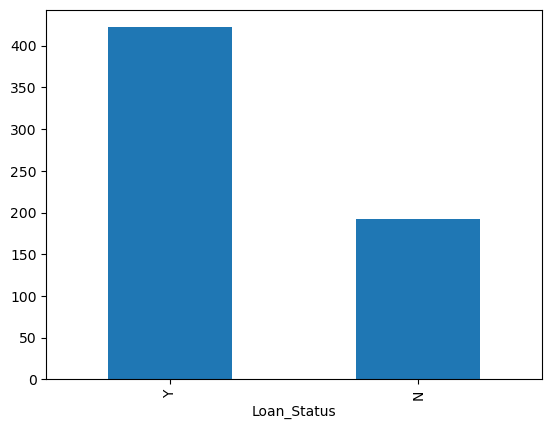

In [73]:
loantrain_EDA.Loan_Status.value_counts().plot(kind='bar')

In [74]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Logistice Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logit=LogisticRegression(max_iter=1000)

In [77]:
logitmodel=logit.fit(X,y)

In [78]:
logitmodel.score(X,y)

0.7784360189573459

In [79]:
logitpredict=logitmodel.predict(X)

In [80]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,290,132
1,55,367


In [81]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [82]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       422
           1       0.74      0.87      0.80       422

    accuracy                           0.78       844
   macro avg       0.79      0.78      0.78       844
weighted avg       0.79      0.78      0.78       844



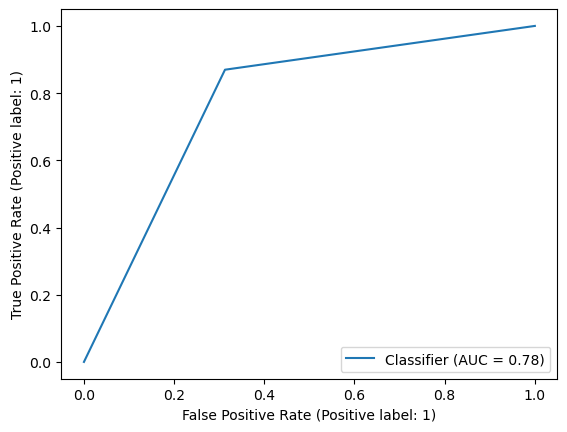

In [83]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [84]:
lrc=cross_val_score(logit,X,y)
lrc

array([0.68047337, 0.71005917, 0.90532544, 0.95266272, 0.92857143])

In [85]:
np.mean(lrc)

0.8354184277261201

In [86]:
logittest=logitmodel.predict(loantest_df)
logittest = map(lambda x: 'Y' if x == 1 else 'N', logittest)

In [87]:
pd.DataFrame(logittest).to_csv("Logit.csv")

# Decission Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
tree=DecisionTreeClassifier(max_depth=5)

In [90]:
treemodel=tree.fit(X,y)

In [91]:
treemodel.score(X,y)

0.8566350710900474

In [92]:
treepredict=treemodel.predict(X)

In [93]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,314,108
1,13,409


In [94]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       422
           1       0.79      0.97      0.87       422

    accuracy                           0.86       844
   macro avg       0.88      0.86      0.85       844
weighted avg       0.88      0.86      0.85       844



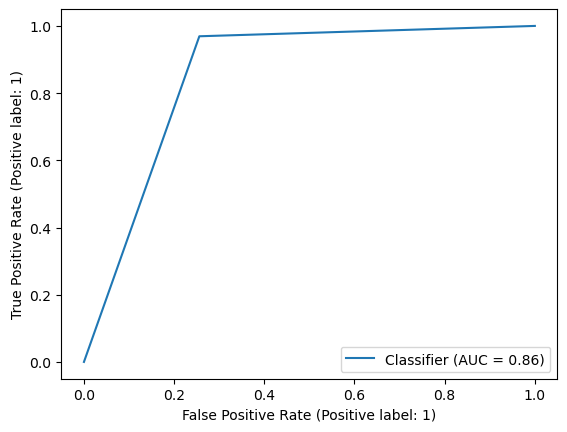

In [95]:
RocCurveDisplay.from_predictions(y,treepredict)

In [96]:
dtc=cross_val_score(tree,X,y)
dtc

array([0.69822485, 0.72189349, 0.77514793, 0.85798817, 0.91071429])

In [97]:
np.mean(dtc)

0.7927937447168217

In [98]:
treetest=treemodel.predict(loantest_df)
treetest = map(lambda x: 'Y' if x == 1 else 'N', treetest)

In [99]:
pd.DataFrame(treetest).to_csv('tree1.csv')

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
RF=RandomForestClassifier(max_depth=4,n_estimators=500)

In [102]:
RFmodel=RF.fit(X,y)

In [103]:
RFmodel.score(X,y)

0.8317535545023697

In [104]:
Ranpredict=RFmodel.predict(X)

In [105]:
pd.crosstab(y,Ranpredict)

col_0,0,1
row_0,,
0,288,134
1,8,414


In [106]:
print(classification_report(y,Ranpredict))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80       422
           1       0.76      0.98      0.85       422

    accuracy                           0.83       844
   macro avg       0.86      0.83      0.83       844
weighted avg       0.86      0.83      0.83       844



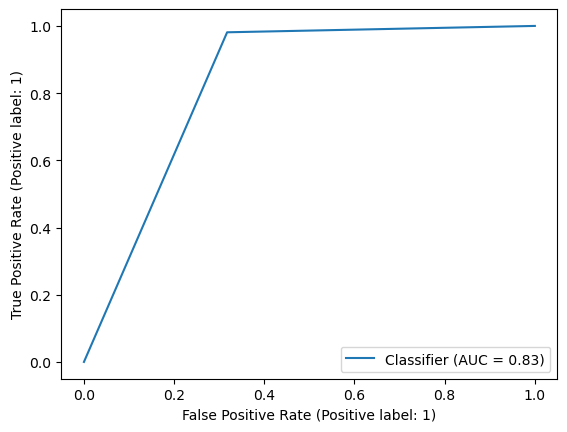

In [107]:
RocCurveDisplay.from_predictions(y,Ranpredict)

In [108]:
rfc=cross_val_score(RF,X,y)
rfc

array([0.68047337, 0.70414201, 0.87573964, 0.92899408, 0.92857143])

In [109]:
np.mean(rfc)

0.8235841081994929

In [110]:
RFpredict=RFmodel.predict(loantest_df)
RFpredict= map(lambda x: 'Y' if x == 1 else 'N', RFpredict)

In [111]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

# Gradient Boosting Machine

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbc=GradientBoostingClassifier(max_depth=3)

In [114]:
gbcmodel=gbc.fit(X,y)

In [115]:
gbcmodel.score(X,y)

0.9111374407582938

In [116]:
gbcpredict=gbcmodel.predict(X)

In [117]:
pd.crosstab(y,gbcpredict)

col_0,0,1
row_0,,
0,351,71
1,4,418


In [118]:
print(classification_report(y,gbcpredict))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       422
           1       0.85      0.99      0.92       422

    accuracy                           0.91       844
   macro avg       0.92      0.91      0.91       844
weighted avg       0.92      0.91      0.91       844



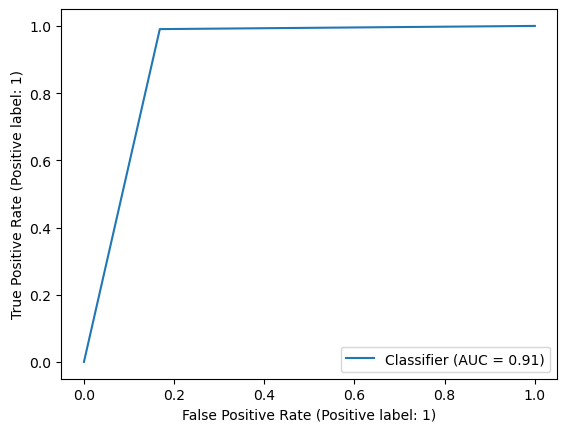

In [119]:
RocCurveDisplay.from_predictions(y,gbcpredict)

In [120]:
gbc=cross_val_score(gbc,X,y)
gbc

array([0.67455621, 0.71005917, 0.86982249, 0.92899408, 0.94047619])

In [121]:
np.mean(gbc)

0.8247816286277825

In [122]:
gbcpredict=gbcmodel.predict(loantest_df)
gbcpredict= map(lambda x: 'Y' if x == 1 else 'N', gbcpredict)

In [123]:
pd.DataFrame(gbcpredict).to_csv('gbc.csv')

# Multinomial Naive Bayes

In [124]:
from sklearn.naive_bayes import MultinomialNB

In [125]:
mul=MultinomialNB()

In [126]:
mulmodel=mul.fit(X,y)

In [127]:
mulmodel.score(X,y)

0.48104265402843605

In [128]:
mulpredict=mulmodel.predict(X)

In [129]:
pd.crosstab(y,mulpredict)

col_0,0,1
row_0,,
0,193,229
1,209,213


In [130]:
print(classification_report(y,mulpredict))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       422
           1       0.48      0.50      0.49       422

    accuracy                           0.48       844
   macro avg       0.48      0.48      0.48       844
weighted avg       0.48      0.48      0.48       844



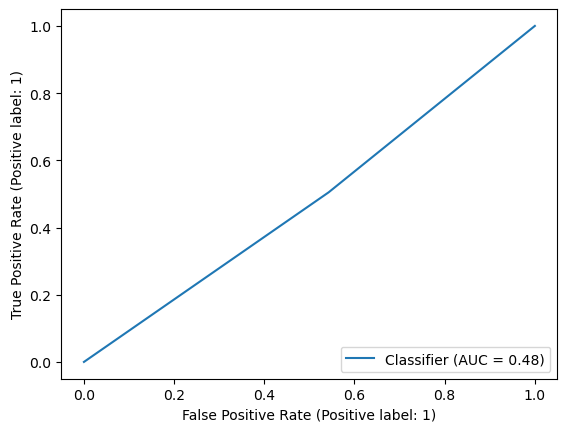

In [131]:
RocCurveDisplay.from_predictions(y,mulpredict)

In [132]:
mulc=cross_val_score(mul,X,y)
mulc

array([0.43786982, 0.5147929 , 0.4556213 , 0.50295858, 0.49404762])

In [133]:
np.mean(mulc)

0.481058044519583

In [134]:
mulpredict=mulmodel.predict(loantest_df)
mulpredict= map(lambda x: 'Y' if x == 1 else 'N', mulpredict)

In [135]:
pd.DataFrame(mulpredict).to_csv('mul.csv')

## Gaussian

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
nbg=GaussianNB()

In [138]:
nbgmodel=nbg.fit(X,y)

In [139]:
nbgmodel.score(X,y)

0.8199052132701422

In [140]:
nbgpredict=nbgmodel.predict(X)

In [141]:
pd.crosstab(y,nbgpredict)

col_0,0,1
row_0,,
0,281,141
1,11,411


In [142]:
print(classification_report(y,nbgpredict))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       422
           1       0.74      0.97      0.84       422

    accuracy                           0.82       844
   macro avg       0.85      0.82      0.82       844
weighted avg       0.85      0.82      0.82       844



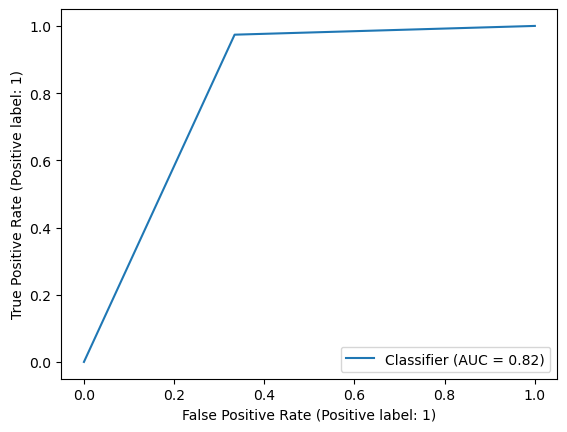

In [143]:
RocCurveDisplay.from_predictions(y,nbgpredict)

In [144]:
gnc=cross_val_score(nbg,X,y)
gnc

array([0.69230769, 0.72781065, 0.86982249, 0.86982249, 0.8452381 ])

In [145]:
np.mean(gnc)

0.8010002817695124

In [146]:
nbgpredict=nbgmodel.predict(loantest_df)
nbgpredict= map(lambda x: 'Y' if x == 1 else 'N', nbgpredict)

In [147]:
pd.DataFrame(nbgpredict).to_csv('ngb.csv')

## Bernoulli's

In [148]:
from sklearn.naive_bayes import BernoulliNB

In [149]:
bb=BernoulliNB()

In [150]:
bbmodel=bb.fit(X,y)

In [151]:
bbmodel.score(X,y)

0.8210900473933649

In [152]:
bbpredict=bbmodel.predict(X)

In [153]:
pd.crosstab(y,bbpredict)

col_0,0,1
row_0,,
0,288,134
1,17,405


In [154]:
print(classification_report(y,bbpredict))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       422
           1       0.75      0.96      0.84       422

    accuracy                           0.82       844
   macro avg       0.85      0.82      0.82       844
weighted avg       0.85      0.82      0.82       844



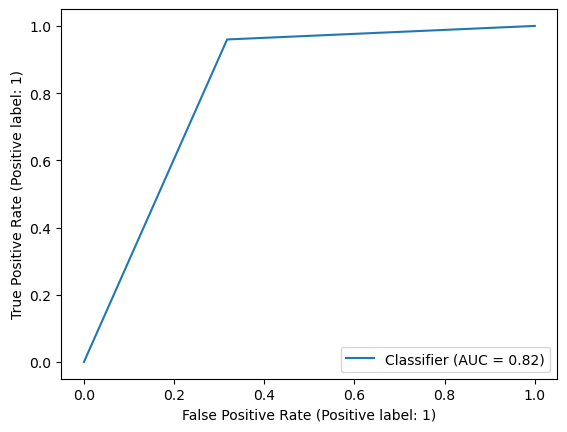

In [155]:
RocCurveDisplay.from_predictions(y,bbpredict)

In [156]:
bbc=cross_val_score(bb,X,y)
bbc

array([0.68047337, 0.70414201, 0.85798817, 0.9112426 , 0.88690476])

In [157]:
np.mean(bbc)

0.8081501831501832

In [158]:
bbpredict=bbmodel.predict(loantest_df)
bbpredict= map(lambda x: 'Y' if x == 1 else 'N', bbpredict)

In [159]:
pd.DataFrame(bbpredict).to_csv('bb.csv')

# Validating the Score in analytics vidya 

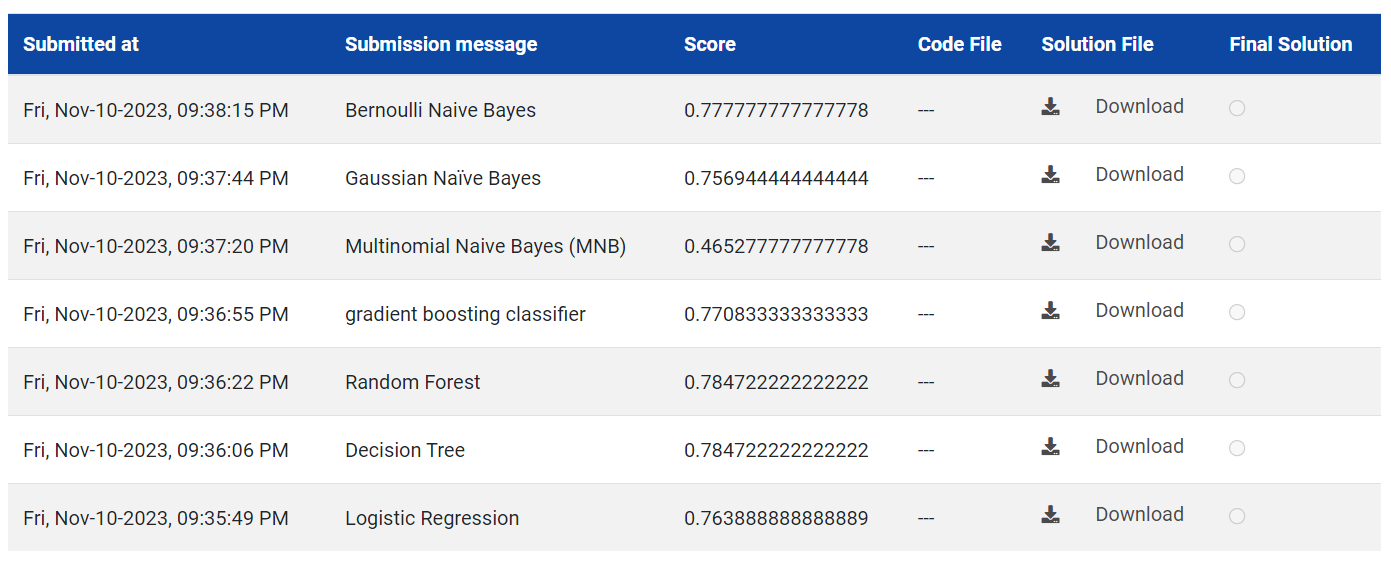
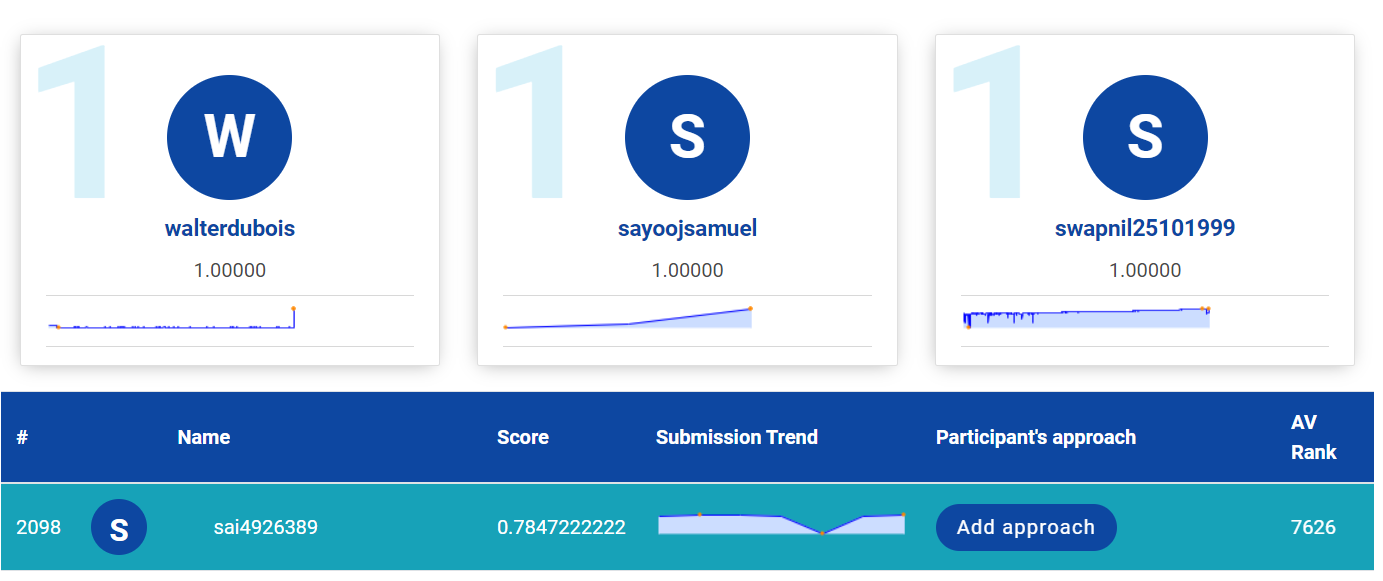

# Summary

We performed a comparative analysis of different machine learning models on the Loan dataset, which contains information about loan applicants and their repayment status. Our goal was to find the best model to predict whether an applicant would default on their loan or not. We used four metrics to evaluate the models: ML model score, which measures how well the model fits the data; accuracy score, which measures how often the model makes correct predictions; ROC/AUC curve value, which measures how well the model distinguishes between positive and negative classes; and cross validation score, which measures how well the model generalizes to unseen data. The table below summarizes the results of our analysis.

| Model | ML model Score | Accuracy Score|ROC/AUC curve values| Cross Valdiation Score|
|:------|:--------------:|:-------------:|:------:|:------:|
|Logistic Regression|0.7784360189573459|0.763888888888889|0.78|0.8354184277261201|
|Decision tree|0.8566350710900474|0.784722222222222|0.86|0.7927937447168217|
|Random Forest|0.8317535545023697|0.784722222222222|0.83|0.8235841081994929|
|**Gradient boosting machines**|**0.9111374407582938**|**0.770833333333333**|**0.91**|**0.8247816286277825**|
|Multinomial Naive Bayes|0.48104265402843605|0.465277777777778|0.48|0.481058044519583|
|Gaussian Naive Bayes|0.8199052132701422|0.756944444444444|0.82|0.8010002817695124|
|Bernoulli Naive Bayes|0.8210900473933649|0.777777777777778|0.82|0.8081501831501832|

As we can see, Gradient Boosting Machines outperformed the other models on both ML model score and ROC/AUC curve value, indicating that it has the best fit and discrimination power among the models tested. It also had a high cross validation score, suggesting that it can handle new data well. Therefore, we recommend Gradient Boosting Machines as the optimal model for predicting loan default.